# Distintos métodos de agrupamiento
Instrucciones
En esta lección aprendiste acerca del agrupamiento K-Means. Algunas veces K-Means no es apropiado para tus datos. Crea un notebook usando los datos ya sea de estas lecciones o de algún otro lugar (dá crédito a tu fuente) y muestra un método de agrupamiento diferente sin usar K-Medias. ¿Qué aprendiste?

[Conjunto de datos: Predicción de fraude con tarjetas de crédito](https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction/data)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("../data/fraud_test.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## Metodo DBSCAN
Un método de agrupamiento alternativo al algoritmo K-Means para este conjunto de datos para detectar fraudes con tarjetas de crédito, se puede considerar utilizar el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN el cual es útil para encontrar regiones de alta densidad en un espacio de características, lo que lo hace efectivo para detectar grupos de puntos que están próximos unos a otros.

1. Vamos a tomar una muestra aleatoria de los datos esto es una estrategia efectiva para reducir el tamaño del conjunto de datos y evitar un problema de memoria al aplicar DBSCAN

In [3]:
# Define el tamaño de la muestra que deseas tomar
tamano_muestra = 10000  # Por ejemplo, tomar una muestra de 10,000 filas

# Toma una muestra aleatoria del DataFrame original
df_muestra = df.sample(n=tamano_muestra, random_state=42)

2. Ahora vamos a aplicar DBSCAN al conjunto de datos utilizando Python y la biblioteca scikit-learn

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Selecciona las características relevantes para el agrupamiento
features = ['amt', 'lat', 'long']

# Normaliza los datos de la muestra
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_muestra[features])

# Define los parámetros para DBSCAN
eps = 0.5  # Radio de la vecindad
min_samples = 10  # Número mínimo de puntos en una vecindad para formar un clúster

# Crea y entrena el modelo DBSCAN con la muestra reducida
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)

# Agrega los resultados de la agrupación al DataFrame de la muestra
df_muestra['cluster'] = clusters

# Imprime la cantidad de grupos encontrados
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Excluir el ruido (-1)
print(f'Se encontraron {num_clusters} grupos con el algoritmo DBSCAN en la muestra reducida.')

Se encontraron 3 grupos con el algoritmo DBSCAN en la muestra reducida.


Se seleccionaron las características relevantes para el agrupamiento (en este caso, 'amt', 'lat' y 'long'). Luego, se normalizaron los datos utilizando `StandardScaler` para que todas las características tengan una escala similar. Después, se define el modelo DBSCAN con los parámetros eps (radio de la vecindad) y min_samples (número mínimo de puntos en una vecindad para formar un clúster). Una vez entrenado el modelo, se asignan etiquetas de grupo a cada punto y se agregan al DataFrame original como la columna `cluster`. Finalmente, se imprime la cantidad de grupos encontrados.

### Representación visual
Ahora podemos crear una representación visual de los grupos encontrados por el algoritmo DBSCAN en la muestra reducida utilizando la biblioteca Seaborn. 

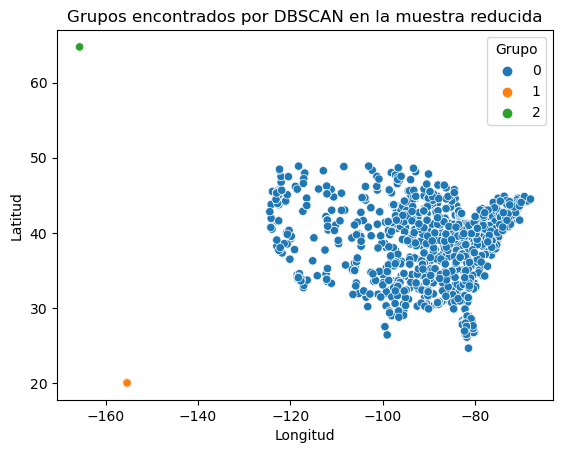

In [7]:
# Filtrar los puntos que no están en el grupo de ruido (-1)
df_muestra_sin_ruido = df_muestra[df_muestra['cluster'] != -1]

# Graficar los puntos coloreados por grupo
sns.scatterplot(data=df_muestra_sin_ruido, x='long', y='lat', hue='cluster', palette='tab10')
plt.title('Grupos encontrados por DBSCAN en la muestra reducida')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Grupo')
plt.show()

En este código, primero se filtro los puntos que no están en el grupo de ruido (-1), ya que estos puntos no están asignados a ningún grupo específico por DBSCAN. Luego, se utilizo `sns.scatterplot` para graficar los puntos en un diagrama de dispersión, donde el color de cada punto representa su grupo asignado por DBSCAN